In [1]:
## 5/4/2018: Try with more images

# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [62]:
# Load pickled data
import pickle

training_file = "./traffic-signs-data/train.p"
testing_file = "./traffic-signs-data/test.p"

training_file = "./traffic-signs-data/train.p"
validation_file = "./traffic-signs-data/valid.p"
testing_file = "./traffic-signs-data/test.p"
signnames_file = "./signnames.csv"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [63]:
import csv
class_names = dict()
with open("./signnames.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader, None)  # Skip the header
    for i,n in reader: 
        class_names[int(i)] = n

---
## Step 0: Load The Data

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [64]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_valid = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].squeeze().shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid, "representing {0:.0f}%".format(n_valid/n_train * 100),"of the training set.")
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410 representing 13% of the training set.
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

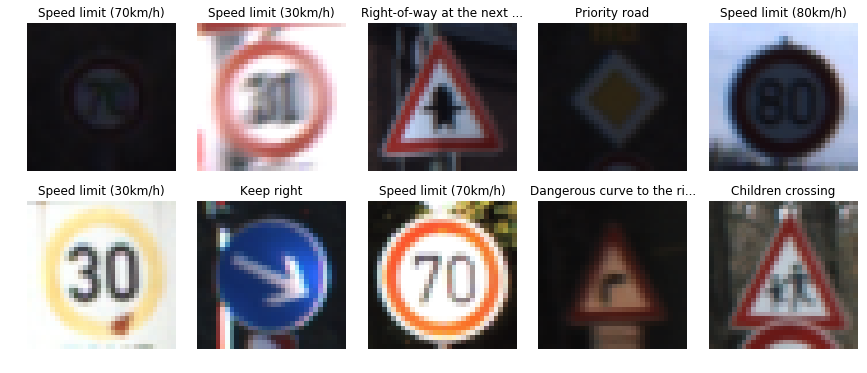

In [65]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random

# Visualizations will be shown in the notebook.
%matplotlib inline

# show image of 10 random data points
N = 10
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=0.1)
axs = axs.ravel()
indexes = random.sample(range(X_train.shape[0]), N)
for i in range(N):
    index = indexes[i]
    img = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(img)
    class_name = class_names[y_train[index]]
    axs[i].set_title((class_name[:25] + '...') if len(class_name) > 25 else class_name)

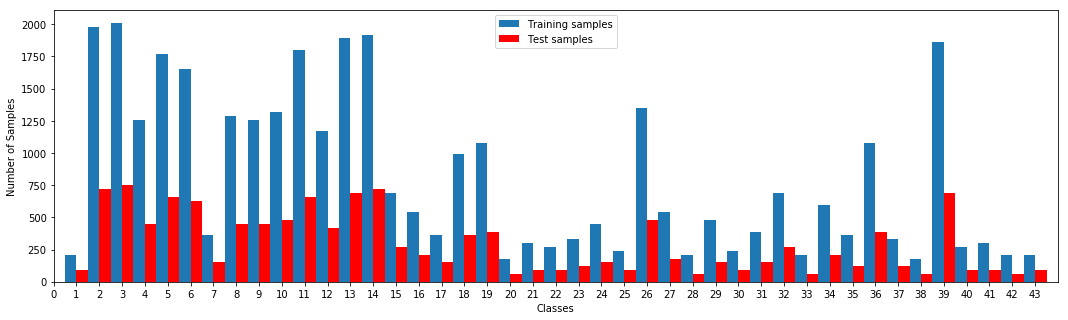

In [66]:
# histogram of label frequency

plt.figure(num=None, figsize=(18, 5))
plt.xlabel('Classes') 
plt.ylabel('Number of Samples')

ax = plt.gca()
ax.set_xlim(1, n_classes+1)
w = 0.5

hist_train, bins_train = np.histogram(y_train, bins=range(1,n_classes+1))
hist_train = np.append(np.roll(hist_train, 1), hist_train[-1])
ax.bar(bins_train-w, hist_train, align='edge', width=w)

hist_test, bins_test = np.histogram(y_test, bins=range(1,n_classes+1))
hist_test = np.append(np.roll(hist_test, 1), hist_test[-1])
ax.bar(bins_test, hist_test, color='r', align='edge', width=w)

ax.legend(('Training samples','Test samples'))

plt.xticks(np.arange(0,n_classes+1,1))
plt.show()

As we can observe from the graph above, the distribution of sample data for the training set is very uneven. We need to understand better the classes that have a large number of samples and the ones we may need to augment with more generated samples.

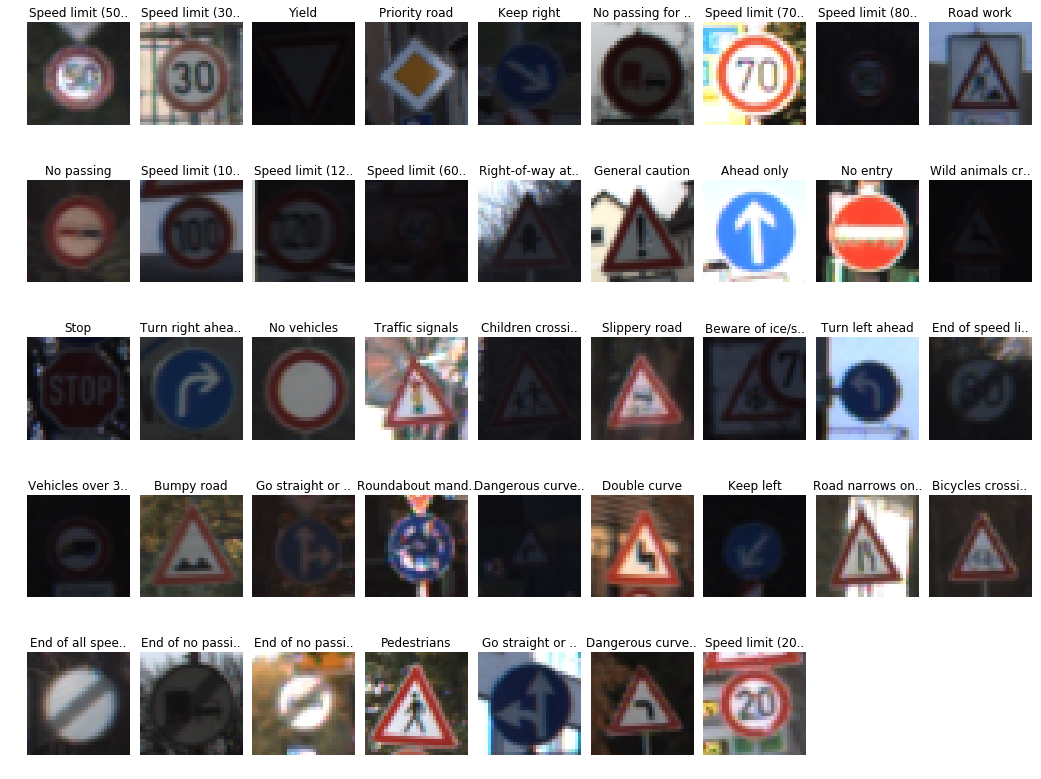

In [67]:
# Display a random shape for each class sorted by sample population

import pandas as pd

series = pd.Series(y_train)
sorted_classes = series.value_counts().index.tolist()
chosen_classes = [np.random.choice(np.ravel(np.where(y_train == class_num))) for class_num in sorted_classes]

fig, axs = plt.subplots(5, 9, figsize=(18, 14))
fig.subplots_adjust(hspace = .2, wspace=0.1)
axs = axs.ravel()

for i in range(axs.size):
    if i < n_classes:
        index = chosen_classes[i]
        img = X_train[index]
        axs[i].imshow(img)
        axs[i].axis('off')
        class_name = class_names[sorted_classes[i]]
        axs[i].set_title((class_name[:15] + '..') if len(class_name) > 15 else class_name)
    else:
        axs[i].set_visible(False)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

*Note 1*: We decided to use grayscale images, transforming RGB to YCrCb and keeping only the brighness part As described in their paper, Pierre Sermanet and Yann LeCun wrote: "The ConvNet was trained with full supervision on the color images of the GTSRB dataset and reached 98.97% accuracy on the phase 1 test set. After the end of phase 1, additional experiments with grayscale images established a new record accuracy of 99.17%." 

*NOTE 2*: We could use the simple pixel normalization technique given in the course and re-written above. Instead we use the opencv equalizeHist function to equalizes the histogram of our grayscale images. The algorithm normalizes the brightness and increases the contrast of the image, which is exactly what we want based on the observations above.

In [68]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import cv2 

def grayscale(img):
    YCrCb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    return np.resize(YCrCb[:,:,0], (32,32,1))

def normalize(img):
    a = -0.5
    b = 0.5
    minimum = 0
    maximum = 255
    return a + ((img - minimum) * (b - a)) / (maximum - minimum)

def preprocess_images(images):
    return np.array([normalize(grayscale(img)) for img in images])

In [69]:
X_train_norm = preprocess_images(X_train)
X_test_norm = preprocess_images(X_test)
X_valid_norm = preprocess_images(X_valid)

print("Training set: ", np.mean(X_train), "⇒", np.mean(X_train_norm))
print("Test set: ", np.mean(X_test), "⇒", np.mean(X_test_norm))

Training set:  82.677589037 ⇒ -0.178755927357
Test set:  82.1484603612 ⇒ -0.181264769801


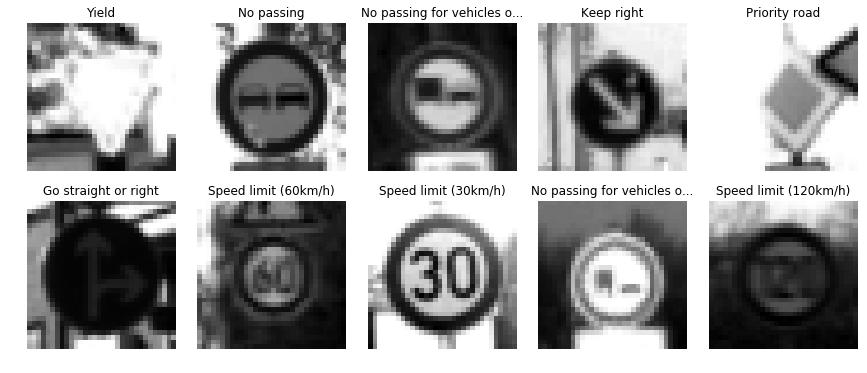

In [70]:
# Visualize rgb vs grayscale
# show image of 10 random preprocessed data points. 

N = 10
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=0.1)
axs = axs.ravel()
indexes = random.sample(range(X_train_norm.shape[0]), N)
for i in range(N):
    index = indexes[i]
    img = X_train_norm[index].squeeze()
    axs[i].axis('off')
    axs[i].imshow(img, cmap='gray')
    class_name = class_names[y_train[index]]
    axs[i].set_title((class_name[:25] + '...') if len(class_name) > 25 else class_name)

*Note 3*: In order to extend the training data set for classes that are under-populated, we have at least a couple of choices: Find more real-life pictures that we would need to classify and pre-process manually, or generate images from our current training set using random spatial transforms and contrast adjustments. We elect the latter as it gives us a reasonable solution for the time constrainst given by the project deadline.

In [71]:
# Generate new image using random transforms

def random_translate(img, offset=2):
    rows, cols = img.shape[:2]
    dx, dy = np.random.randint(-offset, offset, 2)
    M = np.float32([[1, 0, dx], [0, 1, dy]])
    dst = cv2.warpAffine(img, M, (cols, rows), borderMode=cv2.BORDER_REPLICATE)
    dst = dst[:, :, np.newaxis]
    return dst

def random_rotate(img, angle=5):
    rows, cols = img.shape[:2]
    a = np.random.randint(-angle, angle)
    M = cv2.getRotationMatrix2D((cols/2, rows/2), a, 1)
    dst = cv2.warpAffine(img, M, (cols, rows), borderMode=cv2.BORDER_REPLICATE)
    dst = dst[:, :, np.newaxis]
    return dst

def random_scale(img, limit=2):
    rows, cols = img.shape[:2]
    px = np.random.randint(-limit, limit)
    pts1 = np.float32([[px, px], 
                       [rows - px, px], 
                       [px, cols - px], 
                       [rows - px, cols - px]])
    pts2 = np.float32([[0, 0], 
                       [rows, 0], 
                       [0, cols], 
                       [rows, cols]])
    M = cv2.getPerspectiveTransform(pts1, pts2)
    dst = cv2.warpPerspective(img, M, (rows, cols), borderMode=cv2.BORDER_REPLICATE)
    dst = dst[:, :, np.newaxis]
    return dst

def random_warp(img, coef=3):
    rows, cols = img.shape[:2]
    rnd_x = np.random.rand(coef) - 0.5
    rnd_x *= cols * 0.06  # this coefficient determines the degree of warping
    rnd_y = np.random.rand(coef) - 0.5
    rnd_y *= rows * 0.06
    x1 = cols / 4
    x2 = coef * cols / 4
    y1 = rows / 4
    y2 = coef * rows / 4
    pts1 = np.float32([[y1, x1],
                       [y2, x1],
                       [y1, x2]])
    pts2 = np.float32([[y1 + rnd_y[0], x1 + rnd_x[0]],
                       [y2 + rnd_y[1], x1 + rnd_x[1]],
                       [y1 + rnd_y[2], x2 + rnd_x[2]]])
    M = cv2.getAffineTransform(pts1, pts2)
    dst = cv2.warpAffine(img, M, (cols, rows), borderMode=cv2.BORDER_REPLICATE)
    dst = dst[:, :, np.newaxis]
    return dst

def random_brightness(img, shift_factor=2.0):
    shifted = img + 1.0
    img_max_value = max(shifted.flatten())
    max_coef = shift_factor / img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    dst = shifted * coef - 1.0
    return dst

def random_chained(img):
    return random_translate(random_rotate(random_scale(random_warp(random_brightness(img)))))

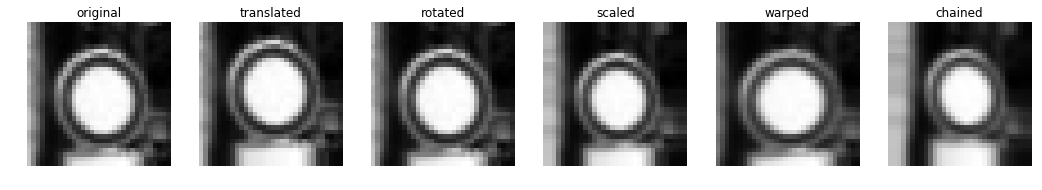

In [72]:
test_img = X_train_norm[random.randint(0, n_train)]

fig, axs = plt.subplots(1, 6, figsize=(18, 3))

funcs = [(lambda x: x), random_translate, random_rotate, random_scale, random_warp, random_chained]
names = ['original', 'translated', 'rotated', 'scaled', 'warped', 'chained']

for i in range(len(funcs)):
    tranformed_img = funcs[i](test_img)

    axs[i].axis('off')
    axs[i].imshow(tranformed_img.squeeze(), cmap='gray')
    axs[i].set_title(names[i])

In [73]:
# Amplify the training set with synthetically generated images.

## Recombine training and validation data
from sklearn.model_selection import train_test_split

X_train_norm = np.concatenate((X_train_norm, X_valid_norm), axis=0)
y_train = np.concatenate((y_train, y_valid), axis=0)

print("Number of training examples =", len(X_train_norm))

Number of training examples = 39209


In [74]:
## Generate samples and add them to the training dataset

series = pd.Series(y_train)
value_counts = series.value_counts(sort=True)
max_count = value_counts.max()

for class_n, row in value_counts.to_frame('counts').iterrows():
    class_indices = np.where(y_train == class_n)
    class_count = row['counts']
    
    n = int(max_count - class_count)
    if n > 0:
        print("Adding", n, "samples to class", class_n+1)
    
        X_extended = np.empty([0, X_train_norm.shape[1], X_train_norm.shape[2], X_train_norm.shape[3]], dtype = X_train_norm.dtype)
        y_extended = np.empty([0], dtype = y_train.dtype)
        for _ in range(n):
            class_index = np.random.choice(np.ravel(class_indices))
            img = X_train_norm[class_index]
            new_img = random_chained(img)
            X_extended = np.concatenate((X_extended, [new_img]), axis=0)
            y_extended = np.concatenate((y_extended, [class_n]), axis=0)

        X_train_norm = np.concatenate((X_train_norm, X_extended), axis=0)
        y_train = np.concatenate((y_train, y_extended), axis=0)

print("Done.")

Adding 30 samples to class 2
Adding 90 samples to class 14
Adding 150 samples to class 13
Adding 180 samples to class 39
Adding 240 samples to class 11
Adding 270 samples to class 5
Adding 390 samples to class 6
Adding 750 samples to class 26
Adding 780 samples to class 10
Adding 810 samples to class 8
Adding 840 samples to class 9
Adding 840 samples to class 4
Adding 930 samples to class 12
Adding 1050 samples to class 19
Adding 1050 samples to class 36
Adding 1140 samples to class 18
Adding 1470 samples to class 32
Adding 1470 samples to class 15
Adding 1561 samples to class 34
Adding 1620 samples to class 16
Adding 1650 samples to class 27
Adding 1710 samples to class 29
Adding 1740 samples to class 24
Adding 1800 samples to class 31
Adding 1830 samples to class 35
Adding 1830 samples to class 7
Adding 1830 samples to class 17
Adding 1860 samples to class 23
Adding 1860 samples to class 37
Adding 1890 samples to class 41
Adding 1890 samples to class 21
Adding 1920 samples to class 2

In [75]:
## Split training and validation sets using a ~25% ratio.

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_norm, y_train, test_size=0.2)

X_test = X_test_norm

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_valid = len(X_valid)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid, "representing {0:.0f}%".format(n_valid/n_train * 100),"of the training set.")

Number of training examples = 77400
Number of validation examples = 19350 representing 25% of the training set.


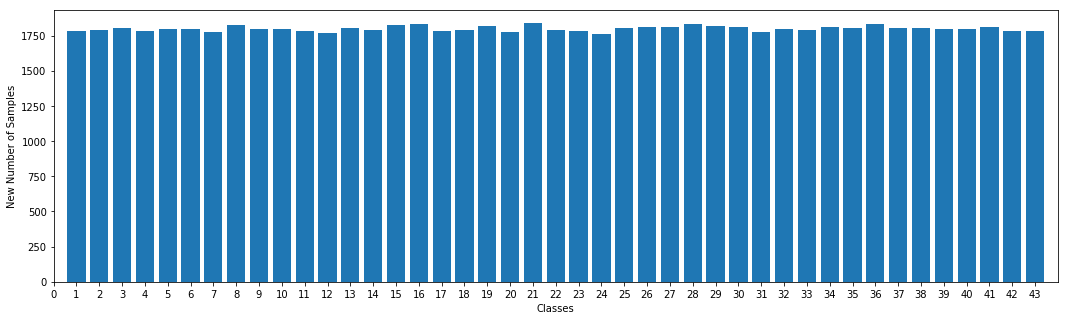

In [76]:
# histogram of label frequency

plt.figure(num=None, figsize=(18, 5))
plt.xlabel('Classes') 
plt.ylabel('New Number of Samples')

ax = plt.gca()
ax.set_xlim(1, n_classes+1)
w = 0.8

hist_train, bins_train = np.histogram(y_train, bins=range(1,n_classes+1))
hist_train = np.append(np.roll(hist_train, 1), hist_train[-1])
ax.bar(bins_train, hist_train, align='center', width=w)

plt.xticks(np.arange(0,n_classes+1,1))
plt.show()

In [77]:
# Shuffle the training dataset
import sklearn

from sklearn.utils import shuffle

X_train, y_train = sklearn.utils.shuffle(X_train, y_train)

print("Done.")

Done.


In [78]:
import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_valid = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].squeeze().shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid, "representing {0:.0f}%".format(n_valid/n_train * 100),"of the training set.")
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 77400
Number of validation examples = 19350 representing 25% of the training set.
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


## Setup TensorFlow
The EPOCH and BATCH_SIZE values affect the training speed and model accuracy.

You do not need to modify this section.



In [79]:
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 128

### Model Architecture

We will be using a similar approach to the LeNet approach shown below:

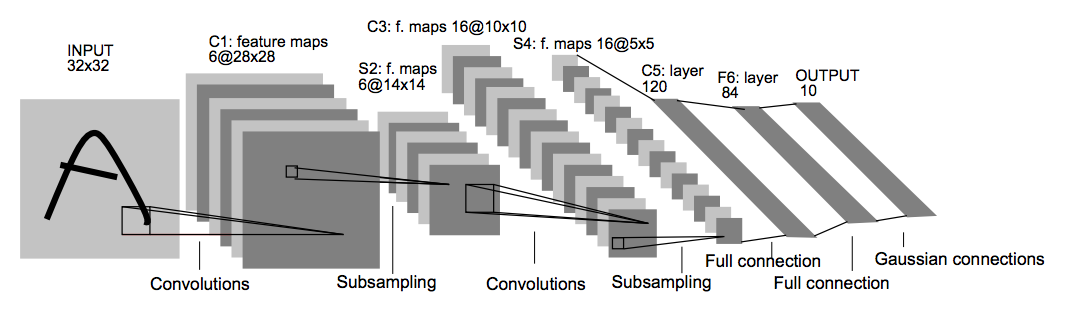

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture

**Layer 1**: Convolutional. The output shape should be 28x28x6.

Activation. Relu activation function.

Pooling. The output shape should be 14x14x6.

**Layer 2**: Convolutional. The output shape should be 10x10x16.

Activation. Relu activation.

Pooling. The output shape should be 5x5x16.

**Layer 3**: Convolutional. The output shape should be 1x1x400.

Activation. Relu activation.


Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten, which is already imported for you.

Concat Layer 2 & 3: The output shape should be 800.

**Layer 4**: Fully Connected (Logits). This should have 43 outputs.

### Output

Return the result of the 2nd fully connected layer.

In [80]:
from tensorflow.contrib.layers import flatten

def LeNetX(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID', name='conv1') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1, name='conv1_relu')
    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='conv1_pool')
    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID', name='conv2') + conv2_b
                     
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2, name='conv2_relu')

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='conv2_pool')
    
    # SOLUTION: Layer 3: Convolutional. Output = 1x1x400.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(400))
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID', name='conv3') + conv3_b

    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3, name='conv3_relu')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    layer2flat = flatten(conv2)
    
    # Flatten x. Input = 1x1x400. Output = 400.
    layer3flat = flatten(conv3)
    
    # Concat layer2flat and x. Input = 400 + 400. Output = 800
    fc0 = tf.concat_v2([layer3flat, layer2flat], 1)
    
    # Dropout
    fc0 = tf.nn.dropout(fc0, keep_prob)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 800. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(800, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc0, fc3_W, name='logits') + fc3_b
    
#     # Layer 3. Fully connected.Input = 800 -> Output = 120
#     fc1_w = tf.Variable(tf.truncated_normal(shape = (800, 120), mean = mu, stddev = sigma))
#     fc1_b = tf.Variable(tf.zeros(120))
#     fc1 = tf.matmul(fc0, fc1_w, name='fc1') + fc1_b
    
#     # Activation
#     fc1 = tf.nn.relu(fc1, name='fc1_relu')
#     # Dropout
#     fc1 = tf.nn.dropout(fc1, keep_prob, name='fc1_dropout')
    
#     # Layer 4. Fully connected. Input = 120 -> Output = 84
#     fc2_w = tf.Variable(tf.truncated_normal(shape = (120, 84), mean = mu, stddev = sigma))
#     fc2_b = tf.Variable(tf.zeros(84))
#     fc2 = tf.matmul(fc1, fc2_w, name='fc2') + fc2_b
    
#     # Activation
#     fc2 = tf.nn.relu(fc2, name='fc2_relu')
    
#     # Dropout
#     fc2 = tf.nn.dropout(fc2, keep_prob, name='fc2_dropout')
    
#     # Layer 5. Fully connected. Input = 84 -> Output = 43 (Number of classes)
#     fc3_w = tf.Variable(tf.truncated_normal(shape = (84, 43), mean = mu, stddev = sigma))
#     fc3_b = tf.Variable(tf.zeros(43))
#     logits = tf.matmul(fc2, fc3_w, name='logits') + fc3_b

    return logits

## Features and Labels

x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.

In [81]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Training Pipeline

Create a training pipeline that uses the model to classify the dataset.

In [82]:
rate = 0.001

logits = LeNetX(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation

Evaluate how well the loss and accuracy of the model for a given dataset.

In [83]:
# metrics and functions for model evaluation
saver = tf.train.Saver()

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.cast(y, tf.int64))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    
    num_examples = X_data.shape[0]
    total_accuracy = 0
    
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += accuracy * len(batch_x)
        
    return total_accuracy / num_examples

### Train the Model

Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

Training...

Epoch 1 ...
Validation Accuracy = 0.866

Epoch 2 ...
Validation Accuracy = 0.928

Epoch 3 ...
Validation Accuracy = 0.955

Epoch 4 ...
Validation Accuracy = 0.969

Epoch 5 ...
Validation Accuracy = 0.976

Epoch 6 ...
Validation Accuracy = 0.977

Epoch 7 ...
Validation Accuracy = 0.983

Epoch 8 ...
Validation Accuracy = 0.984

Epoch 9 ...
Validation Accuracy = 0.983

Epoch 10 ...
Validation Accuracy = 0.987

Epoch 11 ...
Validation Accuracy = 0.985

Epoch 12 ...
Validation Accuracy = 0.987

Epoch 13 ...
Validation Accuracy = 0.989

Epoch 14 ...
Validation Accuracy = 0.990

Epoch 15 ...
Validation Accuracy = 0.989

Epoch 16 ...
Validation Accuracy = 0.988

Epoch 17 ...
Validation Accuracy = 0.988

Epoch 18 ...
Validation Accuracy = 0.990

Epoch 19 ...
Validation Accuracy = 0.991

Epoch 20 ...
Validation Accuracy = 0.991

Epoch 21 ...
Validation Accuracy = 0.991

Epoch 22 ...
Validation Accuracy = 0.991

Epoch 23 ...
Validation Accuracy = 0.991

Epoch 24 ...
Validation Accura

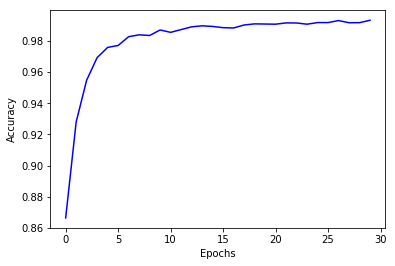

In [84]:
with  tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    
    validation_accuracies = list()
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        validation_accuracies.append(validation_accuracy)

        print("Epoch {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
        # Log current weights
        # checkpointer.save(sess, save_path='./traffic_signs_model.ckpt', global_step=epoch)

        
    saver.save(sess, 'lenet')
    print("Model saved")

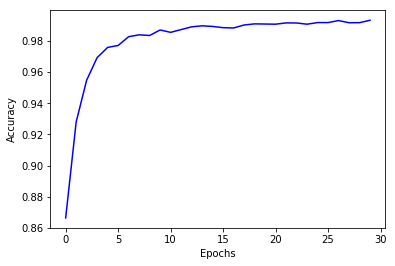

In [85]:
# Display accuracy vs. Epochs.

plt.plot(range(EPOCHS), validation_accuracies, 'b', label='')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [86]:
# Evaluate the accuracy of the model on the test dataset

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

Test Set Accuracy = 0.951


In [87]:
#look at confusion matrix and classification report

from sklearn.metrics import confusion_matrix, classification_report

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    total_predictions = sess.run(tf.argmax(logits, 1),feed_dict={x: X_test, y: y_test, keep_prob: 1.0})
    report = classification_report(y_test, total_predictions)
    print(report)

             precision    recall  f1-score   support

          0       0.92      0.92      0.92        60
          1       0.93      0.98      0.95       720
          2       0.94      0.95      0.94       750
          3       0.92      0.97      0.95       450
          4       0.95      0.94      0.94       660
          5       0.96      0.92      0.94       630
          6       1.00      0.95      0.97       150
          7       0.97      0.90      0.94       450
          8       0.92      0.98      0.95       450
          9       0.98      1.00      0.99       480
         10       1.00      0.98      0.99       660
         11       0.91      0.89      0.90       420
         12       0.97      0.97      0.97       690
         13       1.00      0.99      0.99       720
         14       0.98      0.98      0.98       270
         15       0.92      1.00      0.95       210
         16       1.00      1.00      1.00       150
         17       1.00      0.95      0.97   

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [125]:
### Load the images and plot them here.

### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os, fnmatch
import matplotlib.image as mpimg
import cv2
import numpy as np

img_path = os.listdir("./traffic-sign-images")
n_images = list()
n_labels = list()
n_names  = list()

sign_labels = class_names

# Read images from directory and resize them.
for img_name in fnmatch.filter(img_path, '*.jpg'):
    img = mpimg.imread(os.path.join("./traffic-sign-images", img_name))
    img = cv2.resize(img, image_shape[0:2], interpolation=cv2.INTER_CUBIC)
    idx = int(img_name.split('_')[0])
    if idx < n_classes and not (27<idx<30):
        n_images.append(img)
        n_labels.append(idx)
        n_names += [img_name]     

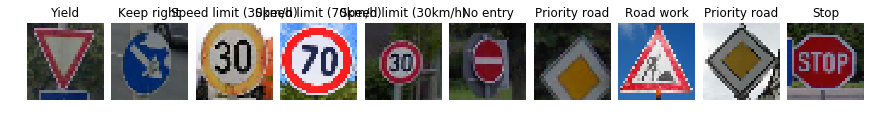

In [126]:
# Display resized images.

fig, axs = plt.subplots(1, len(n_images), figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=0.1)
axs = axs.ravel()
for i in range(len(n_images)):
    img = n_images[i]
    axs[i].axis('off')
    axs[i].imshow(img.squeeze())
    class_name = class_names[n_labels[i]]
    axs[i].set_title((class_name[:25] + '...') if len(class_name) > 25 else class_name)


In [127]:
n_images_norm = preprocess_images(n_images)

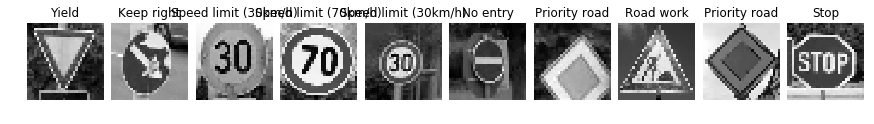

In [128]:
# Display preprocessed images.

fig, axs = plt.subplots(1, len(n_images_norm), figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=0.1)
axs = axs.ravel()
for i in range(len(n_images_norm)):
    img = n_images_norm[i]
    axs[i].axis('off')
    axs[i].imshow(img.squeeze(), cmap="gray")
    class_name = class_names[n_labels[i]]
    axs[i].set_title((class_name[:25] + '...') if len(class_name) > 25 else class_name)

### Predict the Sign Type for Each Image

In [129]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

In [130]:
# Make a prediction on the new images using the trained model

n_images = n_images_norm

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))  
    predicted_logits = sess.run(tf.argmax(logits, 1), feed_dict={x: n_images, y: n_labels, keep_prob: 1.0})

    # output the results in the table
    print(" {p:^50}   {a:^50} ".format(p='PREDICTED', a='ACTUAL RESULT'))
    print()
    for i in range(len(predicted_logits)):
        print("%2s %-50s | %2s %-30s\n" % (predicted_logits[i], sign_labels[int(predicted_logits[i])], 
                                           n_labels[i], sign_labels[int(n_labels[i])]))

                     PREDICTED                                          ACTUAL RESULT                    

13 Yield                                              | 13 Yield                         

38 Keep right                                         | 38 Keep right                    

37 Go straight or left                                |  1 Speed limit (30km/h)          

 1 Speed limit (30km/h)                               |  4 Speed limit (70km/h)          

 1 Speed limit (30km/h)                               |  1 Speed limit (30km/h)          

17 No entry                                           | 17 No entry                      

22 Bumpy road                                         | 12 Priority road                 

25 Road work                                          | 25 Road work                     

12 Priority road                                      | 12 Priority road                 

14 Stop                                               | 14 Stop           

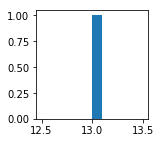

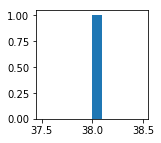

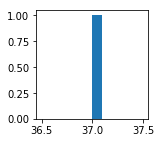

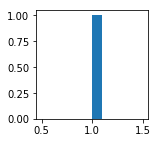

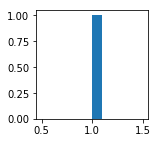

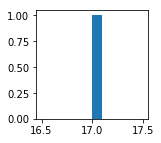

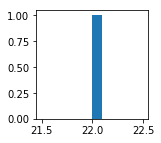

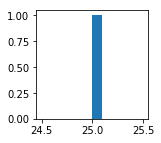

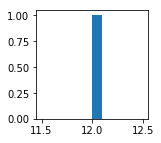

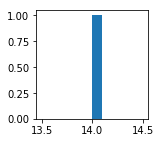

In [131]:
%matplotlib inline

for i in predicted_logits:
    plt.figure(figsize=(2,2))
    plt.hist(i)

### Analyze Performance

In [134]:
### Calculate the accuracy for these 5 new images. 

### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))  
    accuracy = evaluate(n_images, n_labels)
    print( "Accuracy = {:.0f}%".format( accuracy*100. ) )


Accuracy = 70%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

[[  9.58889306e-01   4.10696566e-02   4.01782127e-05   5.49076844e-07
    3.34133603e-07]
 [  1.00000000e+00   3.69548316e-12   1.79447852e-12   5.69275258e-13
    2.90672542e-13]
 [  1.00000000e+00   2.57011790e-09   5.29549959e-10   3.74774127e-12
    2.54890727e-12]
 [  7.29212701e-01   2.16981530e-01   3.88395041e-02   1.29084177e-02
    1.52317004e-03]
 [  9.97499883e-01   2.50006211e-03   3.04869019e-09   2.40100007e-09
    1.53115194e-12]
 [  9.99931216e-01   6.39011851e-05   4.41266457e-06   1.93270651e-07
    1.40128293e-07]
 [  5.24756789e-01   4.75231618e-01   1.06005027e-05   8.27779786e-07
    2.40751120e-07]
 [  9.98285472e-01   1.70900708e-03   5.44127352e-06   6.04040318e-10
    4.12682555e-10]
 [  9.00117695e-01   4.66331579e-02   2.56746095e-02   1.41969416e-02
    5.82735799e-03]
 [  1.00000000e+00   6.95322272e-11   4.79221784e-12   2.65081338e-12
    1.17200260e-12]
 [  1.00000000e+00   4.91582718e-16   2.50245669e-18   8.34720777e-19
    6.83145255e-19]
 [  1.0000

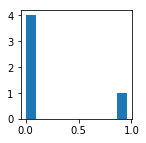

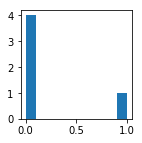

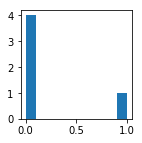

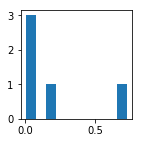

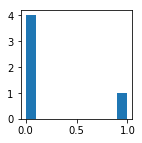

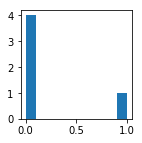

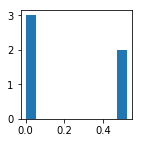

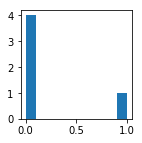

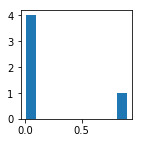

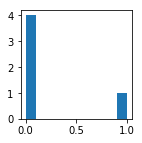

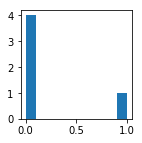

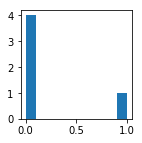

In [111]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

TOP_K = 5
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top_5 = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=TOP_K), feed_dict={x:n_images, keep_prob: 1.0})

    print(top_5.values)
    print(top_5.indices)
    for j,i in enumerate(top_5.values):
        plt.figure(figsize=(2,2))
        plt.hist(i)


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [52]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")